# Preâmbulo

# Código

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

In [2]:
def plot_imagem_cinza(img,titulo):    
    plt.imshow(img,cmap = 'gray')
    plt.title(titulo), plt.xticks([]), plt.yticks([])
    plt.show()

In [3]:
def plot_imagem(img,titulo):    
    plt.imshow(img)
    plt.title(titulo), plt.xticks([]), plt.yticks([])
    plt.show()

In [4]:
def plot_imagem_verde(img,titulo):
    img_preta = np.zeros(img.shape,dtype= np.uint8)
    img_aux = cv2.merge((img_preta,img,img_preta))
    plt.imshow(img_aux)  
    plt.title(titulo), plt.xticks([]), plt.yticks([])
    plt.show()

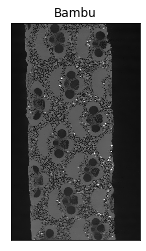

In [5]:
imgname = 'TI_0001.tif'
img = cv2.imread(imgname,0)
plot_imagem_cinza(img,'Bambu')

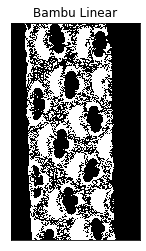

In [17]:
linear = 80
img_linear = np.where(img < linear, img, 255)
img_linear = np.where(img >= linear, img_linear,0)
plot_imagem_cinza(img_linear,'Bambu Linear')

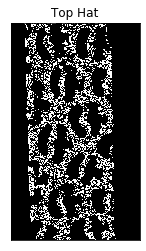

In [18]:
kernel = np.ones((9,9),np.uint8)
erosao = cv2.erode(img_linear,kernel,iterations = 1)
abertura = cv2.dilate(erosao,kernel,iterations = 1)
top_hat = img_linear - abertura

plt.imshow(top_hat,cmap = 'gray')
plt.title('Top Hat'), plt.xticks([]), plt.yticks([])
plt.show()

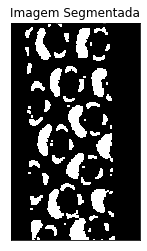

In [19]:
segmentacao_discos = img_linear - top_hat
plot_imagem_cinza(segmentacao_discos,'Imagem Segmentada')

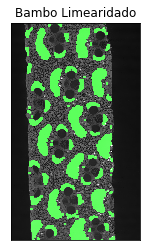

In [22]:
verde = np.where(segmentacao_discos == 0, img, 255)
img_rgb = cv2.merge((img,verde,img))
plot_imagem(img_rgb, "Bambo Limearidado")

# Resultados

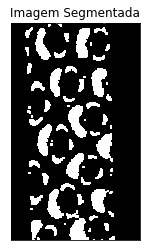

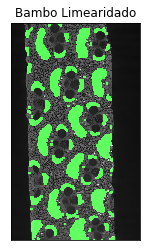

Imagem Original

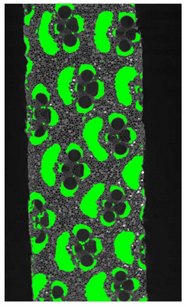

# Análises

Com a imagem fusionada e possivel perceber mais detalhes e uma melhor resolução, isso porque ao darmos zoom acabamos gerando valores por interpolação e não valores reais.

Já quando pegando os valores da banda 8, que já apresenta uma maior resolução e mais fiel a relidade temos uma imagem fusionada de maior resolução.